In [14]:
#Company’s management wants to invest on proposals on managing some of the best teams in the league. The analytics
#department has been assigned with a task of creating a report on the performance shown by the teams. Some of the older teams are already in
#contract with competitors. Hence Company X wants to understand which teams they can approach which will be a deal win for them

import pandas as pd

df = pd.read_csv('BASKETBALL.csv')
numeric_columns = ['Score', 'PlayedGames', 'WonGames', 'DrawnGames', 'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion', 'Runner-up']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

import matplotlib.pyplot as plt
import seaborn as sns





In [6]:
from google.colab import files
files.upload()





Saving BASKETBALL.csv to BASKETBALL.csv


{'BASKETBALL.csv': b'Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld\r\nTeam 61,1,-,-,-,-,-,-,-,-,-,2017~18,9\r\nTeam 7,82,2792,2626,948,608,1070,3609,3889,-,-,1929,3\r\nTeam 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1\r\nTeam 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1\r\nTeam 6,73,2819,2408,990,531,887,3680,3373,1,4,1934-35,1\r\nTeam 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1\r\nTeam 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1\r\nTeam 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1\r\nTeam 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1\r\nTeam 9,58,2109,1986,698,522,766,2683,2847,-,1,1939-40,2\r\nTeam 12,51,1789,1698,586,389,723,2278,2624,-,-,1939-40,4\r\nTeam 10,51,1884,1728,606,440,682,2159,2492,1,-,1932-33,1\r\nTeam 14,44,1416,1428,453,336,639,1843,2368,-,1,1929,2\r\nTeam 11,45,1814,1530,563,392,575,2052,2188,1,5,1941to42,1\r\nTeam 13,42,1471,1466,46

In [7]:
#Read the data set, clean the data and prepare final dataset to be used for analysis
df = pd.read_csv('BASKETBALL.csv')
print(df)

       Team  Tournament Score PlayedGames WonGames DrawnGames LostGames  \
0   Team 61           1     -           -        -          -         -   
1    Team 7          82  2792        2626      948        608      1070   
2    Team 5          86  3368        2762     1209        633       920   
3    Team 4          82  3386        2664     1187        616       861   
4    Team 6          73  2819        2408      990        531       887   
..      ...         ...   ...         ...      ...        ...       ...   
56  Team 59           1    19          30        7          5        18   
57  Team 57           1    34          38        8         10        20   
58  Team 60           1    14          30        5          4        21   
59  Team 58           1    22          30        7          8        15   
60  Team 56           1    35          38        8         11        19   

   BasketScored BasketGiven TournamentChampion Runner-up TeamLaunch  \
0             -           - 

In [8]:
print (df.head())

      Team  Tournament Score PlayedGames WonGames DrawnGames LostGames  \
0  Team 61           1     -           -        -          -         -   
1   Team 7          82  2792        2626      948        608      1070   
2   Team 5          86  3368        2762     1209        633       920   
3   Team 4          82  3386        2664     1187        616       861   
4   Team 6          73  2819        2408      990        531       887   

  BasketScored BasketGiven TournamentChampion Runner-up TeamLaunch  \
0            -           -                  -         -    2017~18   
1         3609        3889                  -         -       1929   
2         4631        3700                  8         7       1929   
3         4398        3469                  6         6   1931to32   
4         3680        3373                  1         4    1934-35   

   HighestPositionHeld  
0                    9  
1                    3  
2                    1  
3                    1  
4        

In [9]:
    print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB
None


In [10]:
# Handling missing values,  replacing missing values in 'TournamentChampion' with 0
df['TournamentChampion'].fillna(0, inplace=True)

In [11]:
# Check for missing values again after handling
print(df.isnull().sum())

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64


In [15]:
# Impute missing values in numeric columns with mean
numeric_columns = ['Score', 'PlayedGames', 'WonGames', 'DrawnGames', 'LostGames', 'BasketScored', 'BasketGiven', 'Runner-up']
for col in numeric_columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Check for missing values again
print(df.isnull().sum())

Team                    0
Tournament              0
Score                   0
PlayedGames             0
WonGames                0
DrawnGames              0
LostGames               0
BasketScored            0
BasketGiven             0
TournamentChampion     52
Runner-up               0
TeamLaunch              0
HighestPositionHeld     0
dtype: int64


In [16]:
# Dropping  rows with missing 'TeamLaunch'
df.dropna(subset=['TeamLaunch'], inplace=True)
print(df.isnull().sum())


Team                    0
Tournament              0
Score                   0
PlayedGames             0
WonGames                0
DrawnGames              0
LostGames               0
BasketScored            0
BasketGiven             0
TournamentChampion     52
Runner-up               0
TeamLaunch              0
HighestPositionHeld     0
dtype: int64


In [17]:
#Handling Missing Values
missing_values = df.isnull().sum()
print(missing_values)


Team                    0
Tournament              0
Score                   0
PlayedGames             0
WonGames                0
DrawnGames              0
LostGames               0
BasketScored            0
BasketGiven             0
TournamentChampion     52
Runner-up               0
TeamLaunch              0
HighestPositionHeld     0
dtype: int64


In [18]:
# Converting  object columns to numeric types
cols_to_convert = ['Score', 'PlayedGames', 'WonGames', 'DrawnGames', 'LostGames',
                   'BasketScored', 'BasketGiven', 'TournamentChampion', 'Runner-up']

df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Check the data types after conversion
print(df.dtypes)


Team                    object
Tournament               int64
Score                  float64
PlayedGames            float64
WonGames               float64
DrawnGames             float64
LostGames              float64
BasketScored           float64
BasketGiven            float64
TournamentChampion     float64
Runner-up              float64
TeamLaunch              object
HighestPositionHeld      int64
dtype: object


In [19]:
# Convert 'TeamLaunch' to datetime format
df['TeamLaunch'] = pd.to_datetime(df['TeamLaunch'], errors='coerce')


In [20]:
print (df.head())

      Team  Tournament    Score  PlayedGames     WonGames  DrawnGames  \
0  Team 61           1   916.45        810.1   309.033333  192.083333   
1   Team 7          82  2792.00       2626.0   948.000000  608.000000   
2   Team 5          86  3368.00       2762.0  1209.000000  633.000000   
3   Team 4          82  3386.00       2664.0  1187.000000  616.000000   
4   Team 6          73  2819.00       2408.0   990.000000  531.000000   

     LostGames  BasketScored  BasketGiven  TournamentChampion  Runner-up  \
0   308.816667       1159.35  1159.233333                 NaN   6.615385   
1  1070.000000       3609.00  3889.000000                 NaN   6.615385   
2   920.000000       4631.00  3700.000000                 8.0   7.000000   
3   861.000000       4398.00  3469.000000                 6.0   6.000000   
4   887.000000       3680.00  3373.000000                 1.0   4.000000   

  TeamLaunch  HighestPositionHeld  
0        NaT                    9  
1 1929-01-01                    

In [21]:

print(df.describe())


       Tournament       Score  PlayedGames     WonGames  DrawnGames  \
count   61.000000    61.00000    61.000000    61.000000   61.000000   
mean    24.000000   916.45000   810.100000   309.033333  192.083333   
std     26.827225  1128.81685   870.122457   405.063080  200.295223   
min      1.000000    14.00000    30.000000     5.000000    4.000000   
25%      4.000000   107.00000   116.000000    35.000000   27.000000   
50%     12.000000   416.00000   426.000000   125.000000  102.000000   
75%     38.000000  1351.00000  1318.000000   426.000000  330.000000   
max     86.000000  4385.00000  2762.000000  1647.000000  633.000000   

         LostGames  BasketScored  BasketGiven  TournamentChampion  Runner-up  \
count    61.000000     61.000000    61.000000            9.000000  61.000000   
mean    308.816667   1159.350000  1159.233333            9.666667   6.615385   
std     292.044089   1499.410471  1154.206601           11.618950   3.626470   
min      15.000000     34.000000    55.0

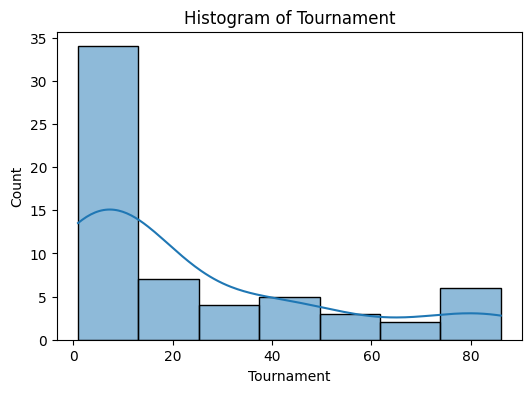

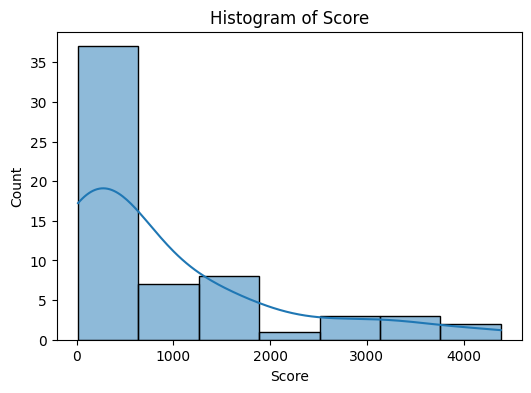

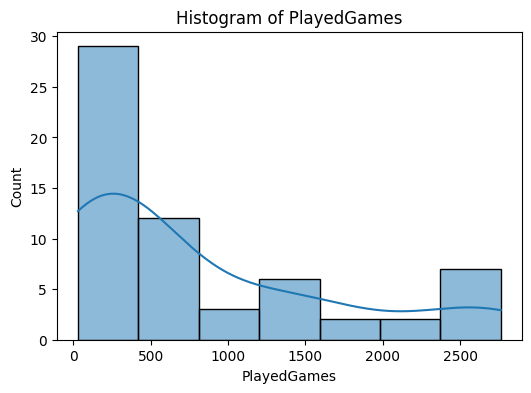

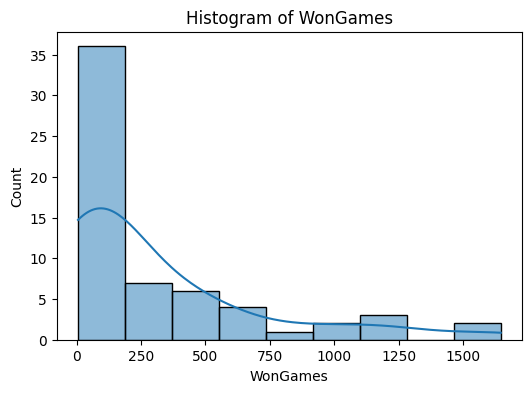

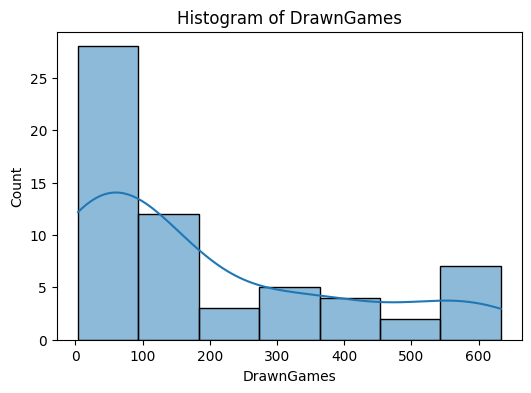

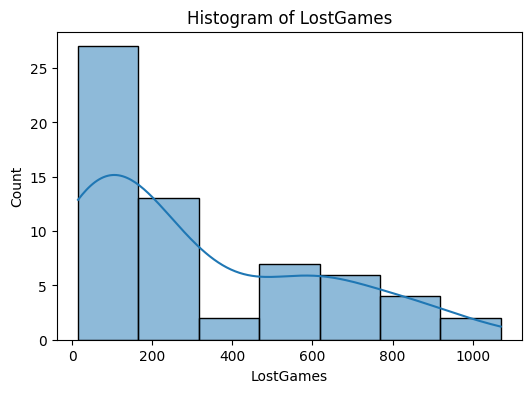

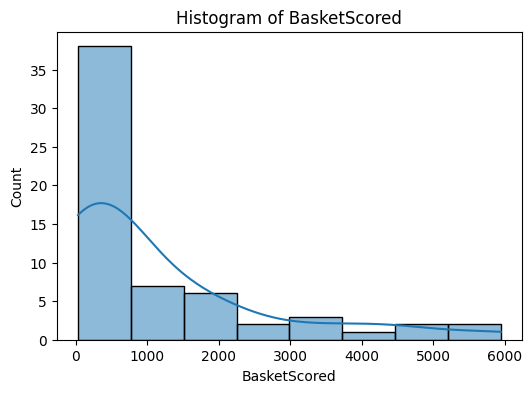

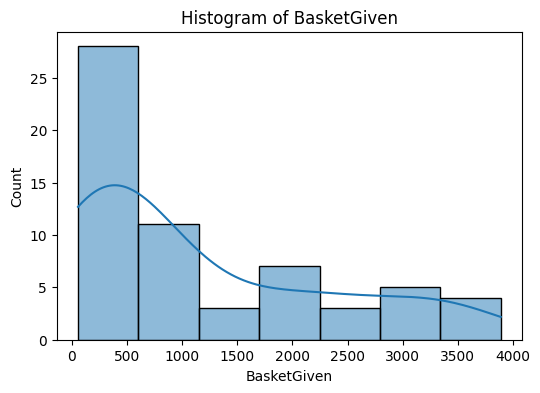

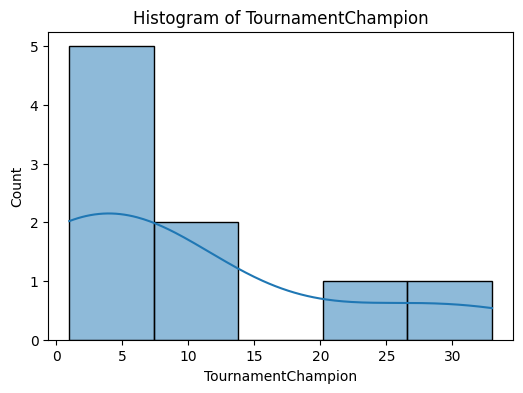

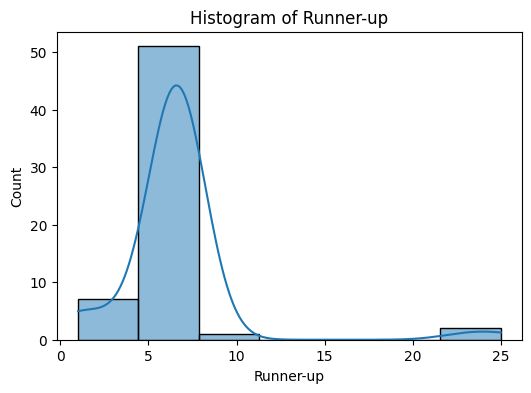

In [23]:
# Univariate Analysis
numeric_columns = ['Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames', 'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion', 'Runner-up']
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

<ipython-input-24-2936088a544c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


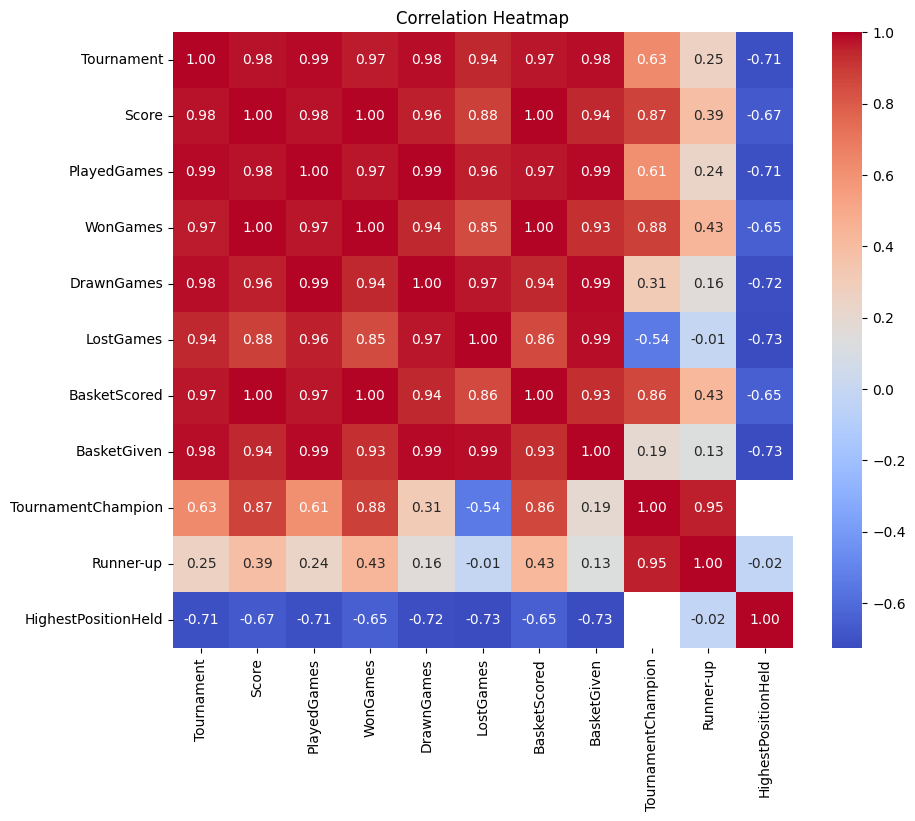

In [24]:
# Bivariate Analysis
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

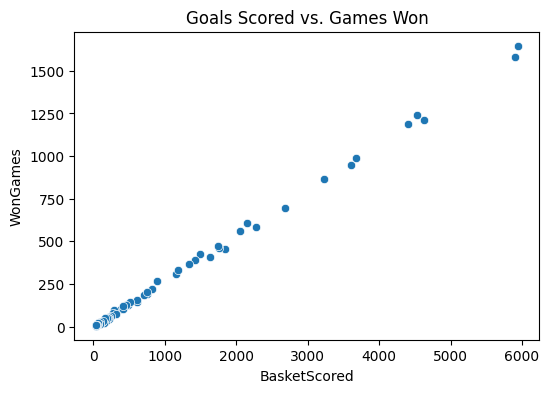

In [25]:
# Scatter plot for goals scored vs. games won
plt.figure(figsize=(6, 4))
sns.scatterplot(x='BasketScored', y='WonGames', data=df)
plt.title('Goals Scored vs. Games Won')
plt.show()

In [26]:
# Multivariate Analysis
# Cluster analysis using KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df[['Score', 'PlayedGames']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


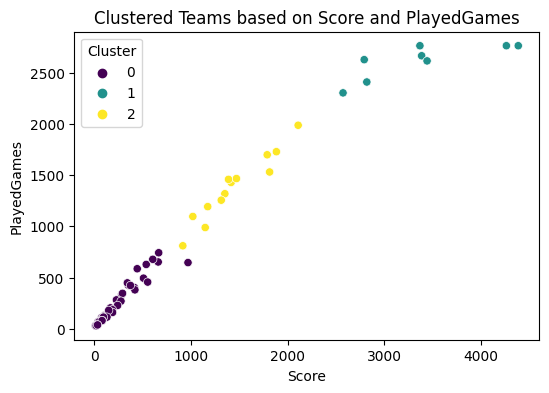

In [27]:
# Visualization of clustered data
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Score', y='PlayedGames', hue='Cluster', data=df, palette='viridis')
plt.title('Clustered Teams based on Score and PlayedGames')
plt.show()

In [28]:
# Print oldest and newest teams
print("Oldest Team:")
print(df[df['TeamLaunch'] == df['TeamLaunch'].min()])

print("\nNewest Team:")
print(df[df['TeamLaunch'] == df['TeamLaunch'].max()])


Oldest Team:
       Team  Tournament   Score  PlayedGames  WonGames  DrawnGames  LostGames  \
1    Team 7          82  2792.0       2626.0     948.0       608.0     1070.0   
2    Team 5          86  3368.0       2762.0    1209.0       633.0      920.0   
5    Team 3          80  3442.0       2614.0    1241.0       598.0      775.0   
6    Team 8          70  2573.0       2302.0     864.0       577.0      861.0   
7    Team 1          86  4385.0       2762.0    1647.0       552.0      563.0   
8    Team 2          86  4262.0       2762.0    1581.0       573.0      608.0   
12  Team 14          44  1416.0       1428.0     453.0       336.0      639.0   
40  Team 45           7   107.0        130.0      43.0        21.0       66.0   
47  Team 52           4    56.0         72.0      21.0        14.0       37.0   
52  Team 54           3    42.0         54.0      18.0         6.0       30.0   

    BasketScored  BasketGiven  TournamentChampion  Runner-up TeamLaunch  \
1         3609.0    

In [29]:
# Top performing team based on 'Score'
top_performing_team = df[df['Score'] == df['Score'].max()]['Team'].values[0]
print(f"Top Performing Team based on Score: {top_performing_team}")


Top Performing Team based on Score: Team 1


In [30]:
# Find the best performing team
best_team = df[df['WonGames'] == df['WonGames'].max()]
print("\nBest Performing Team:")
print(best_team)



Best Performing Team:
     Team  Tournament   Score  PlayedGames  WonGames  DrawnGames  LostGames  \
7  Team 1          86  4385.0       2762.0    1647.0       552.0      563.0   

   BasketScored  BasketGiven  TournamentChampion  Runner-up TeamLaunch  \
7        5947.0       3140.0                33.0       23.0 1929-01-01   

   HighestPositionHeld  Cluster  
7                    1        1  


In [31]:
# Team with the lowest performance (Assuming lowest performance based on WonGames)
lowest_performance_team = df[df['WonGames'] == df['WonGames'].min()]
print("\nTeam with the Lowest Performance based on WonGames:")
print(lowest_performance_team[['Team', 'WonGames']])


Team with the Lowest Performance based on WonGames:
       Team  WonGames
58  Team 60       5.0


In [ ]:
# Team with the highest goals scored ('BasketScored')
highest_goals_team = df[df['BasketScored'] == df['BasketScored'].max()]['Team'].values[0]
print(f"Team with Highest Goals: {highest_goals_team}")

Team with Highest Goals: Team 1


In [ ]:
# Calculating win rate based on 'WonGames' and 'PlayedGames'
df['WinRate'] = df['WonGames'] / df['PlayedGames']


In [ ]:
#Please include any improvements or suggestions to the association management on quality, quantity, variety, velocity, veracity etc. on the
#data points collected by the association to perform a better data analysis in future. At-least 1 suggestion for each point

#Quality:

#Implement Data Validation Protocols

#Establish precise data validation methods to ensure accuracy and consistency. This includes checking for errors, missing values, and
# outliers on a regular basis.
#To ensure high-quality data integrity, implement validation procedures during data gathering. To correct any discrepancies or inaccuracies, regular data cleansing
#methods should be used.

#Quantity :
#Increase the number of data sources.

#Explanation: By adding more sources, you can increase the volume of data collected. Diversify data collecting methods to collect information
#from a variety of sources, such as surveys, social media, IoT devices, or third-party data providers. A larger dataset allows for more in-depth
# analysis and a better grasp of trends and patterns.

#variety :
#Divеrsifying thе typеs of data bеing collеctеd is еssеntial. Incorporatе various data formats likе structurеd, unstructurеd, and sеmi-structurеd data.
# For еxamplе bеyond traditional numеrical data, includе tеxt, imagеs, vidеos, and othеr multimеdia sourcеs to gain a comprеhеnsivе
#undеrstanding of thе subjеct mattеr.

#VELOCITY :

#Real-time Data Capture :

# Establish real-time data capture systems to gather and handle data as it is produced. To instantly collect and analyze data, make use of technologies
# like API connections and Internet of Things devices. Making decisions quickly is made possible by real-time data, particularly in dynamic situations
#where prompt actions or interventions are required.

#VERACITY :



#Improve Data Governance:

#To guarantee data dependability and credibility, reinforce data governance systems. Provide precise guidelines, norms, and procedures
#for the gathering, storing, and use of data. To preserve the authenticity and correctness of data, audits and validation checks should be carried out on a
#regular basis. Adopting monitoring and data quality metrics systems aids in guaranteeing accuracy at every stage of the data lifecycle.



#Please include any improvements or suggestions to the association management on quality, quantity, variety, velocity, veracity etc. on the
#data points collected by the association to perform a better data analysis in future. At-least 1 suggestion for each point

#Quality:

#Implement Data Validation Protocols

#Establish precise data validation methods to ensure accuracy and consistency. This includes checking for errors, missing values, and
# outliers on a regular basis.
#To ensure high-quality data integrity, implement validation procedures during data gathering. To correct any discrepancies or inaccuracies, regular data cleansing
#methods should be used.

#Quantity :
#Increase the number of data sources.

#Explanation: By adding more sources, you can increase the volume of data collected. Diversify data collecting methods to collect information
#from a variety of sources, such as surveys, social media, IoT devices, or third-party data providers. A larger dataset allows for more in-depth
# analysis and a better grasp of trends and patterns.

#variety :
#Divеrsifying thе typеs of data bеing collеctеd is еssеntial. Incorporatе various data formats likе structurеd, unstructurеd, and sеmi-structurеd data.
# For еxamplе bеyond traditional numеrical data, includе tеxt, imagеs, vidеos, and othеr multimеdia sourcеs to gain a comprеhеnsivе
#undеrstanding of thе subjеct mattеr.

#VELOCITY :

#Real-time Data Capture :

# Establish real-time data capture systems to gather and handle data as it is produced. To instantly collect and analyze data, make use of technologies
# like API connections and Internet of Things devices. Making decisions quickly is made possible by real-time data, particularly in dynamic situations
#where prompt actions or interventions are required.

#VERACITY :



#Improve Data Governance:

#To guarantee data dependability and credibility, reinforce data governance systems. Provide precise guidelines, norms, and procedures
#for the gathering, storing, and use of data. To preserve the authenticity and correctness of data, audits and validation checks should be carried out on a
#regular basis. Adopting monitoring and data quality metrics systems aids in guaranteeing accuracy at every stage of the data lifecycle.

